In [7]:
!pip install dash
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [11]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

# Load data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/dataset/Data Sales/supermarket_sales.csv'
data = pd.read_csv(file_path)


# Initialize Dash app
app = Dash(__name__)

# Example visualizations
fig_sales_branch = px.bar(data, x='Branch', y='Total', color='City',
                          title="Penjualan per Cabang")
fig_product_line = px.pie(data, names='Product line', values='Total',
                          title="Distribusi Penjualan per Kategori Produk")
fig_time_sales = px.line(data, x='Date', y='Total', title="Tren Penjualan Harian")

# Layout
app.layout = html.Div([
    html.H1("Dashboard Penjualan Supermarket", style={'text-align': 'center'}),
    dcc.Graph(figure=fig_sales_branch),
    dcc.Graph(figure=fig_product_line),
    dcc.Graph(figure=fig_time_sales),
])

if __name__ == "__main__":
    app.run_server(debug=True)


Mounted at /content/drive


<IPython.core.display.Javascript object>

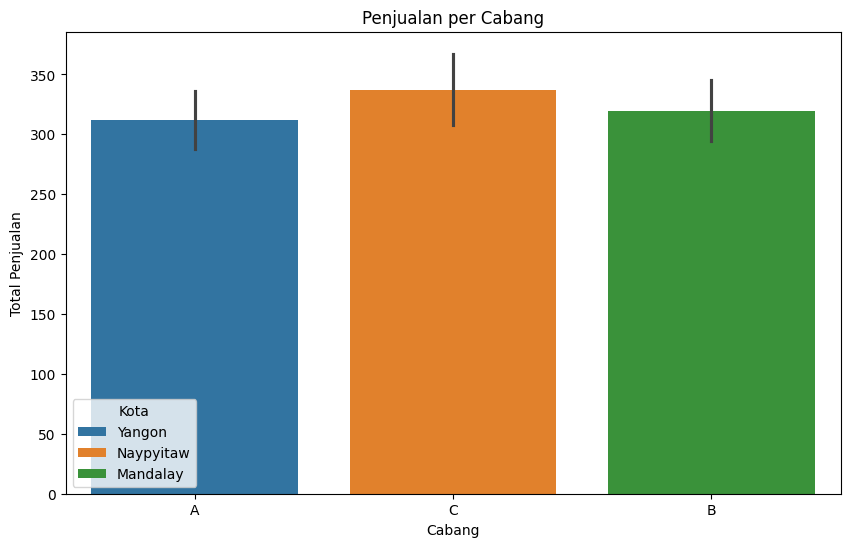

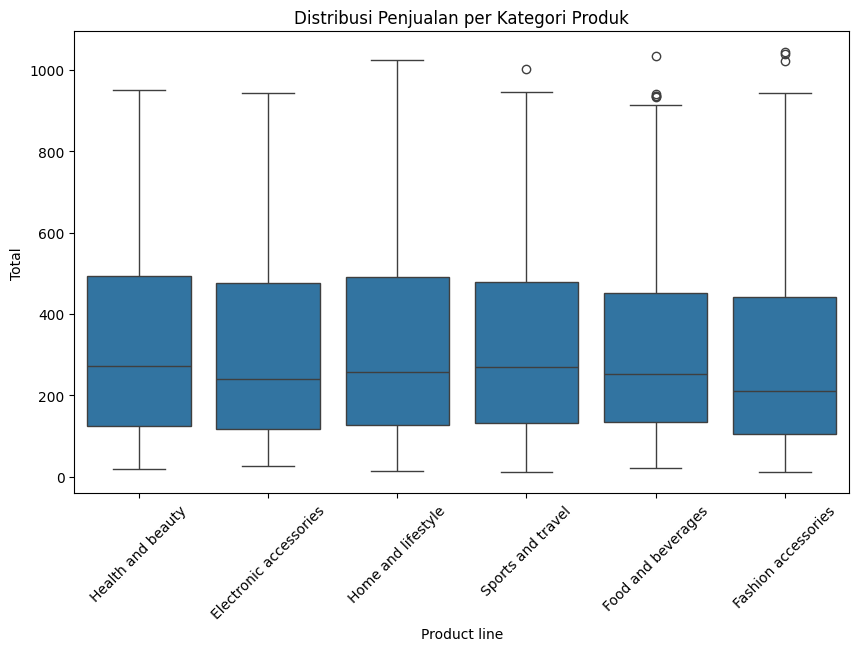

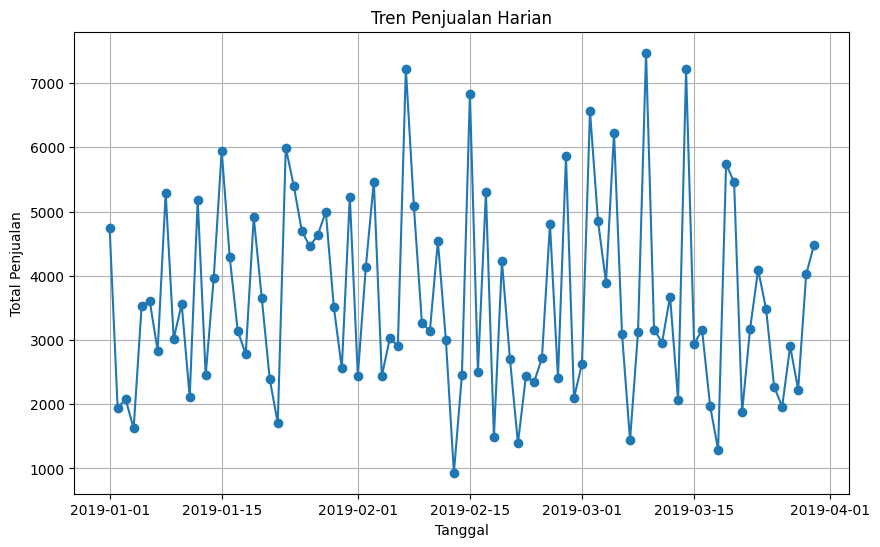

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran default
plt.rcParams['figure.figsize'] = (10, 6)

# Grafik Penjualan per Cabang
sns.barplot(x='Branch', y='Total', data=data, hue='City')
plt.title("Penjualan per Cabang")
plt.xlabel("Cabang")
plt.ylabel("Total Penjualan")
plt.legend(title="Kota")
plt.show()

# Distribusi Penjualan per Kategori Produk
sns.boxplot(x='Product line', y='Total', data=data)
plt.title("Distribusi Penjualan per Kategori Produk")
plt.xticks(rotation=45)
plt.show()

# Tren Penjualan Harian
data['Date'] = pd.to_datetime(data['Date'])
daily_sales = data.groupby('Date')['Total'].sum().reset_index()

plt.plot(daily_sales['Date'], daily_sales['Total'], marker='o')
plt.title("Tren Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.grid(True)
plt.show()


In [16]:
!ngrok config add-authtoken 2sDnvNMKiPxCgNU9CBqHcRCeZXr_79roGo9BkpXNMCL1ZwHQM


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [17]:
public_url = ngrok.connect(port)
print(f"Aplikasi Dash Anda tersedia di: {public_url}")


Aplikasi Dash Anda tersedia di: NgrokTunnel: "https://e177-34-80-164-34.ngrok-free.app" -> "http://localhost:8050"


In [18]:
from pyngrok import ngrok

# Jalankan aplikasi Dash di host lokal
port = 8050
app.run_server(port=port, debug=False, use_reloader=False)  # Jangan reload ulang di Colab

# Tautkan aplikasi Dash ke ngrok
public_url = ngrok.connect(port)
print(f"Aplikasi Dash Anda tersedia di: {public_url}")

<IPython.core.display.Javascript object>

Aplikasi Dash Anda tersedia di: NgrokTunnel: "https://a54c-34-80-164-34.ngrok-free.app" -> "http://localhost:8050"
